##🎓 Ödev: Pokémon Efsanevi Sınıflandırması (ML Pipeline Projesi) ##



1. Kurulum ve Kütüphaneler

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [4]:
# warningleri kapatma
import warnings
warnings.filterwarnings("ignore")

2. Veri Yükleme ve İnceleme

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/Pokemon.csv'
df = pd.read_csv(file_path)

3. Veri Setinin Genel Yapısı

In [7]:
df.shape #veri setinin satır-sütun sayısı

(800, 13)

In [8]:
# İlk 5 satırı görüntüle
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
# Veri tipi bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
# İstatistiksel özet
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [12]:
# Eksik değer kontrolü
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [13]:
df.isnull().sum() / len(df) * 100

,0
#,0.00
Name,0.00
Type 1,0.00
Type 2,48.25
Total,0.00
HP,0.00
Attack,0.00
Defense,0.00
Sp. Atk,0.00
Sp. Def,0.00


Kategorik değişkenleri LabelEncoder veya OneHotEncoder ile sayısal forma çevirme

*Hedef Değişkeni Dönüştür (Legendary → 0/1)*

In [16]:
df['Legendary'] = df['Legendary'].astype(int)


In [17]:
print("Type 1 kategorileri:", df['Type 1'].nunique())
print("Type 2 kategorileri:", df['Type 2'].nunique())

Type 1 kategorileri: 18
Type 2 kategorileri: 18


In [18]:
print("Type 1 eşsiz değerler:\n", df['Type 1'].unique())
print("\nType 2 eşsiz değerler:\n", df['Type 2'].unique())


Type 1 eşsiz değerler:
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

Type 2 eşsiz değerler:
 ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [19]:
label_enc = LabelEncoder()
df['Type 1'] = label_enc.fit_transform(df['Type 1'])
df['Type 2'] = label_enc.fit_transform(df['Type 2'])

In [20]:
print(df.head(10))

   #                       Name  Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur       9      13    318  45      49       49   
1  2                    Ivysaur       9      13    405  60      62       63   
2  3                   Venusaur       9      13    525  80      82       83   
3  3      VenusaurMega Venusaur       9      13    625  80     100      123   
4  4                 Charmander       6      18    309  39      52       43   
5  5                 Charmeleon       6      18    405  58      64       58   
6  6                  Charizard       6       7    534  78      84       78   
7  6  CharizardMega Charizard X       6       2    634  78     130      111   
8  6  CharizardMega Charizard Y       6       7    634  78     104       78   
9  7                   Squirtle      17      18    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1          0  
1       80       80     60

Tek tipe sahip mi? (True → 1, False → 0)

In [21]:
df['Is_Mono_Type'] = (df['Type 2'] == 'None').astype(int)

Saldırı / Savunma oranı (Attack / Defense)

In [22]:
df['Attack_Defense_Ratio'] = df['Attack'] / df['Defense']
df['Attack_Defense_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)

Aykırı Değer Analizi

In [25]:
#aykırı değer analizinde ve görselleştirmede kullanacağımız sayısal sütunlar
num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Attack_Defense_Ratio']

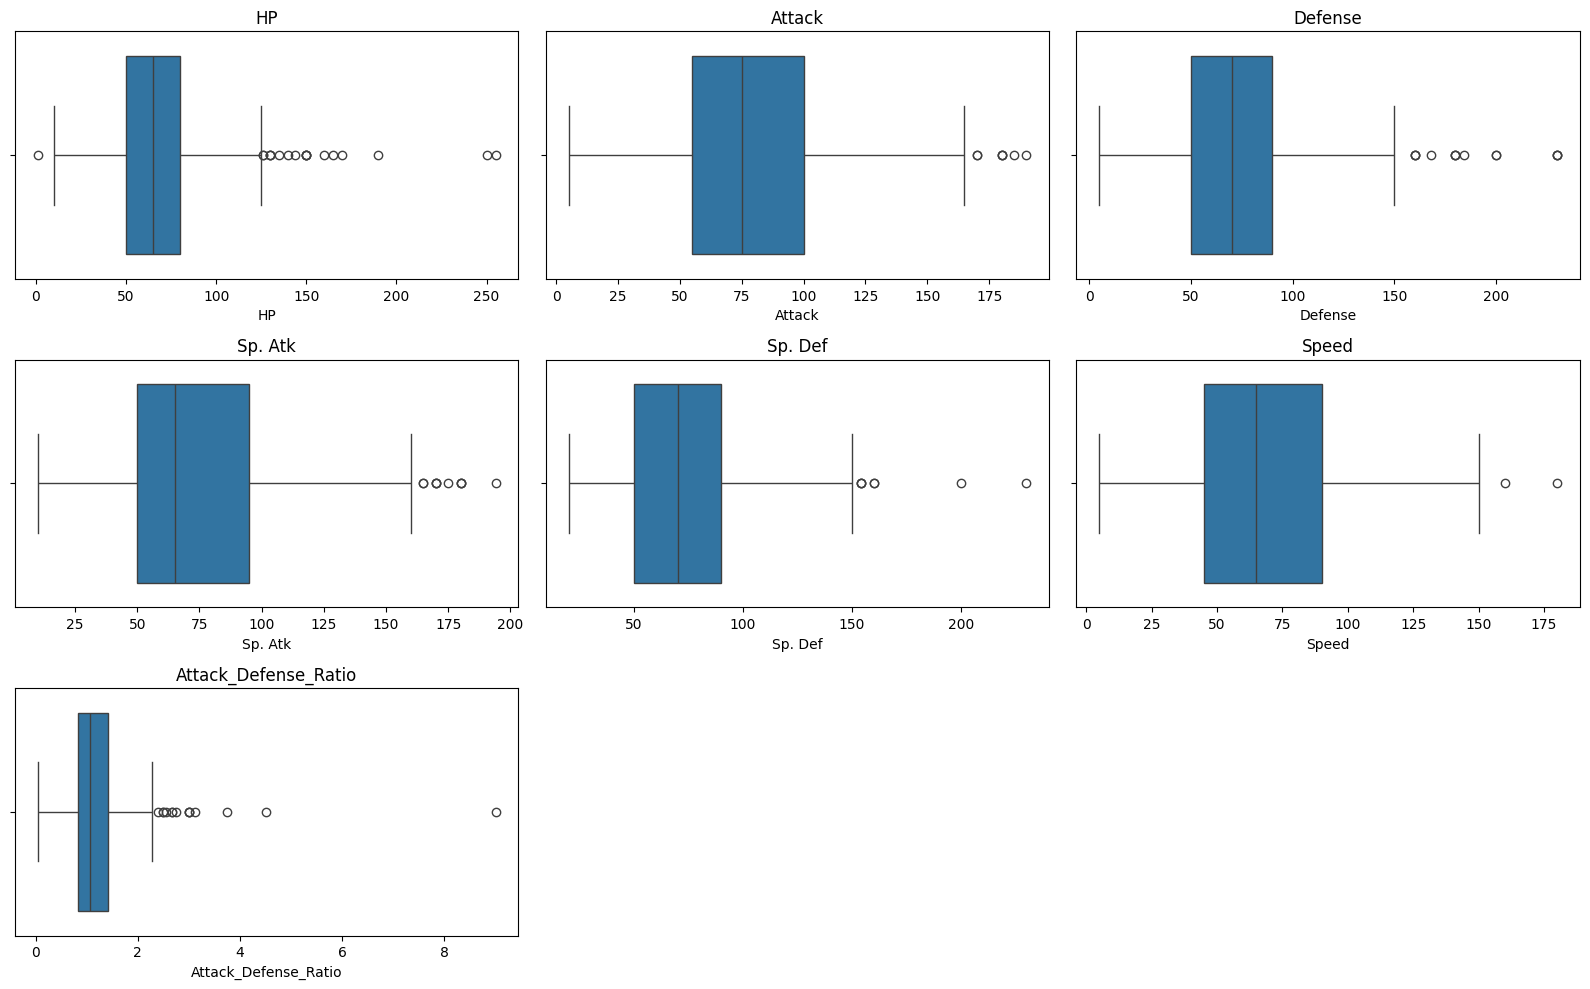

In [27]:
plt.figure(figsize=(16, 10))  # Tüm grafikler için genel figür boyutunu belirleriz.

for i, col in enumerate(num_cols, 1):  # Her bir sayısal sütunu sırayla işleriz.
    plt.subplot(3, 3, i)  # 3x3 matris içinde alt grafik (subplot) oluştururuz.
    sns.boxplot(data=df, x=col)  # Belirli sütun için kutu grafiği çizeriz.
    plt.title(col)  # Grafiğe sütun adını başlık olarak ekleriz.

plt.tight_layout()  # Alt grafiklerin birbirine çakışmaması için düzenleme yapar.
plt.show()  # Tüm grafikleri gösterir.


In [28]:
#Aykırı Değer Analiz Fonksiyonu
def aykiri_deger_analizi(df, kolon):
    Q1 = df[kolon].quantile(0.25)  # 1. çeyrek (Q1)
    Q3 = df[kolon].quantile(0.75)  # 3. çeyrek (Q3)
    IQR = Q3 - Q1  # Çeyrekler arası açıklık (Interquartile Range)

    alt_sinir = Q1 - 1.5 * IQR  # Aykırı değer alt sınırı
    ust_sinir = Q3 + 1.5 * IQR  # Aykırı değer üst sınırı

    # Aykırı değerleri belirle
    aykirilar = df[(df[kolon] < alt_sinir) | (df[kolon] > ust_sinir)]

    # Aykırı değer sayısını ekrana yazdır
    print(f"{kolon} sütununda {len(aykirilar)} aykırı değer var.")

    return aykirilar  # Aykırı değerleri geri döndür


In [29]:
#Tüm Sayısal Sütunlarda Aykırı Değer Analizi
aykiri_rapor = {}  # Her sütundaki aykırı değer sayısını saklamak için sözlük

for col in num_cols:
    aykirilar = aykiri_deger_analizi(df, col)  # Fonksiyonu her sütun için uygula
    aykiri_rapor[col] = len(aykirilar)  # Sonuçları sözlüğe kaydet


HP sütununda 19 aykırı değer var.
Attack sütununda 7 aykırı değer var.
Defense sütununda 13 aykırı değer var.
Sp. Atk sütununda 10 aykırı değer var.
Sp. Def sütununda 7 aykırı değer var.
Speed sütununda 2 aykırı değer var.
Attack_Defense_Ratio sütununda 14 aykırı değer var.


Bu sonuçlar bize:

HP sütununda çok sayıda ekstrem değer olduğunu,

Speed sütununun ise oldukça dengeli olduğunu,

Attack_Defense_Ratio gibi türetilmiş bir değişkende dahi dikkat edilmesi gereken uç değerler bulunduğunu gösteriyor.

💡 Ne Yapabilirim?
Aykırı değerleri ;
Silme: Aykırıları veri setinden çıkarmak.

Dönüştürme: Log, Box-Cox, Winsorize gibi yöntemlerle etkiyi azaltmak.

Ayrı olarak analiz etme: Aykırıları ayrı bir segment olarak incelemek.

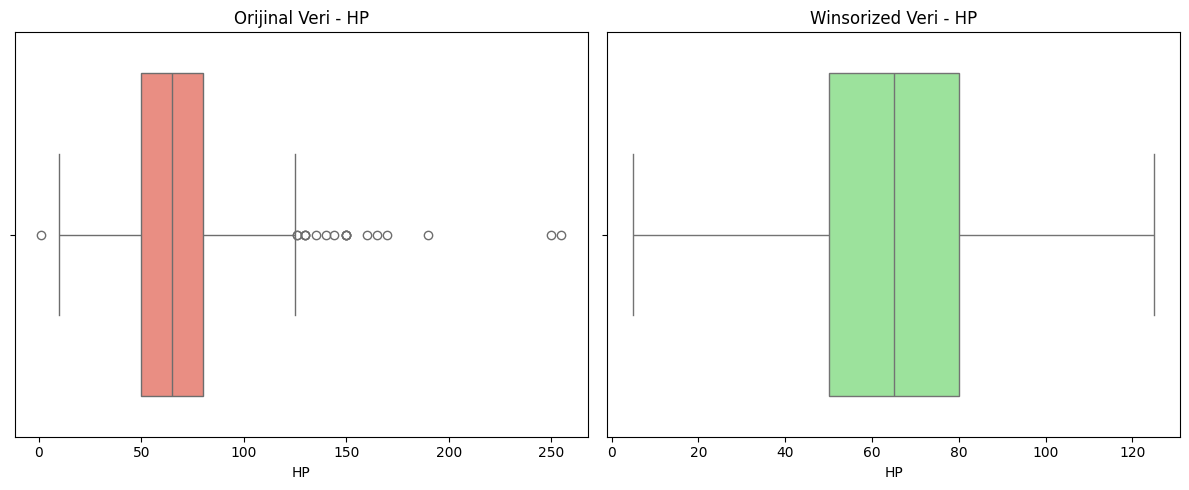

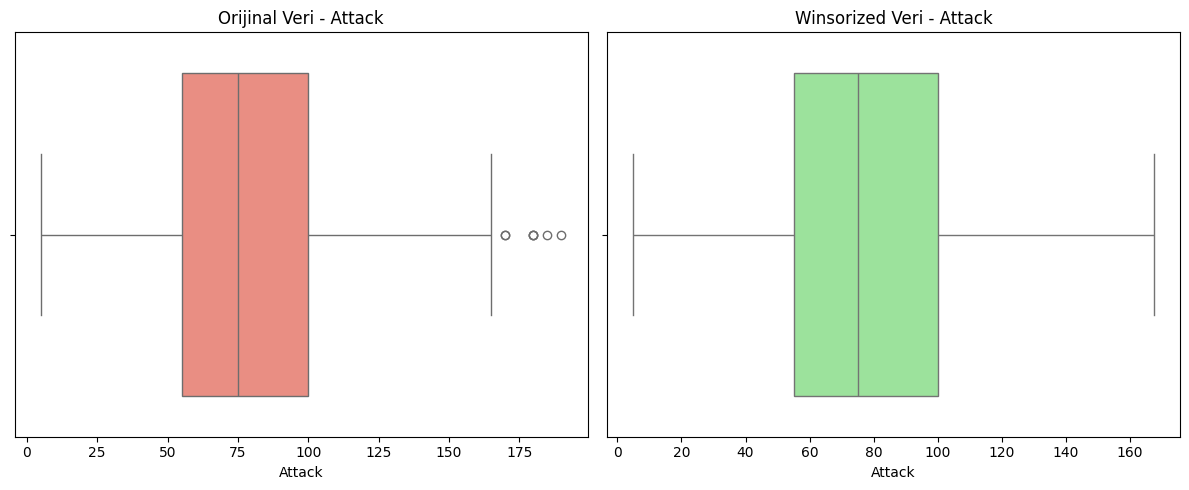

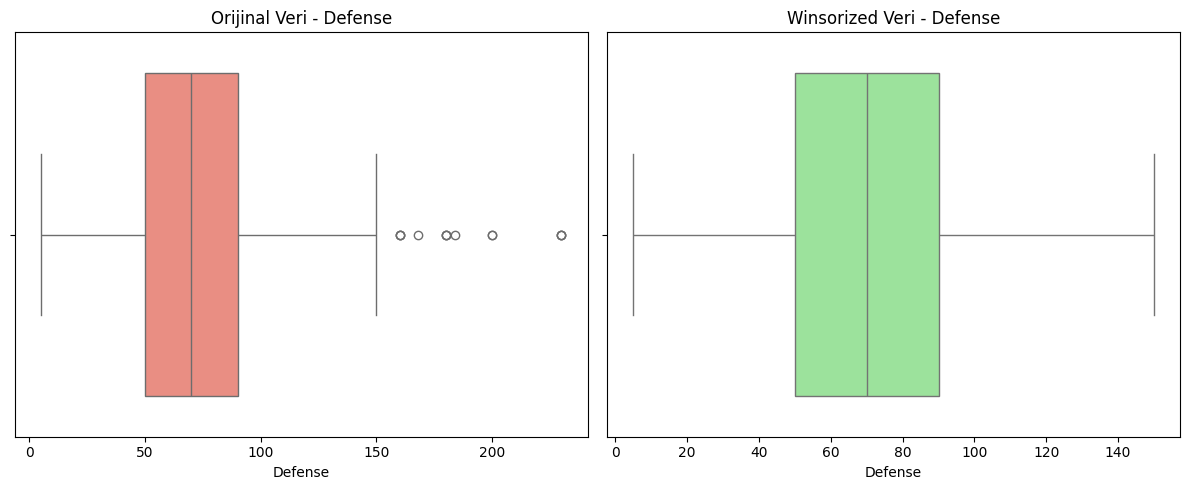

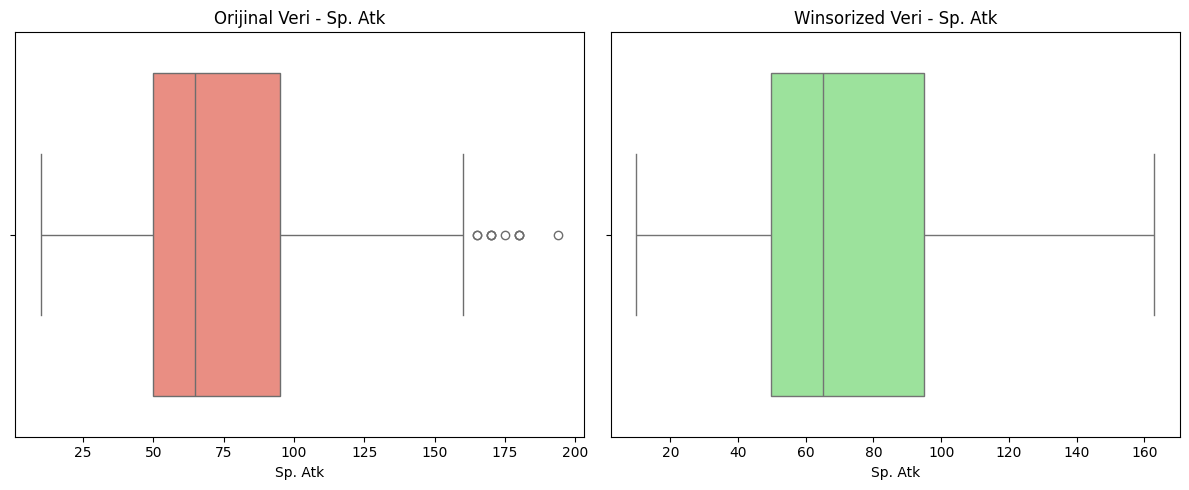

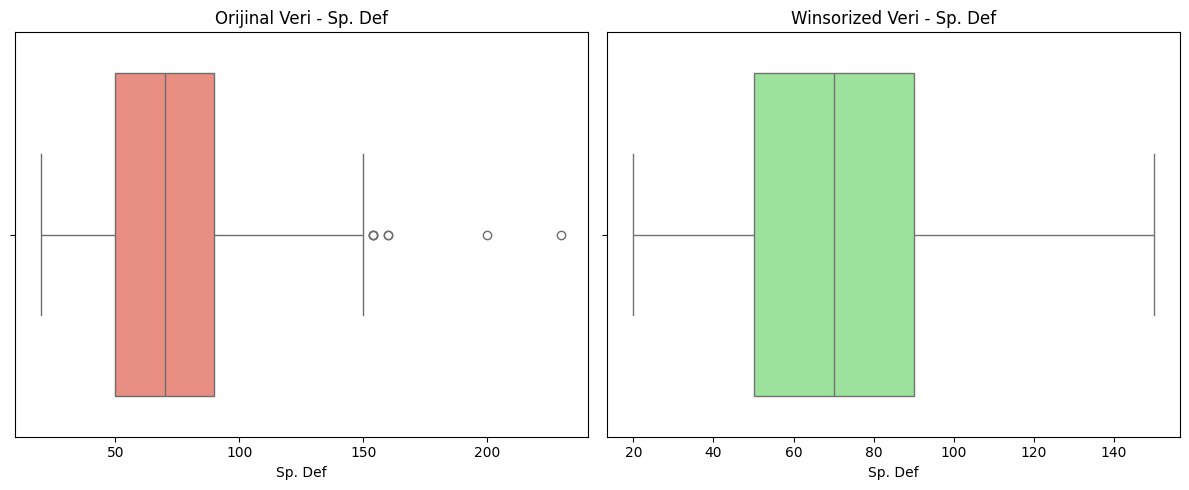

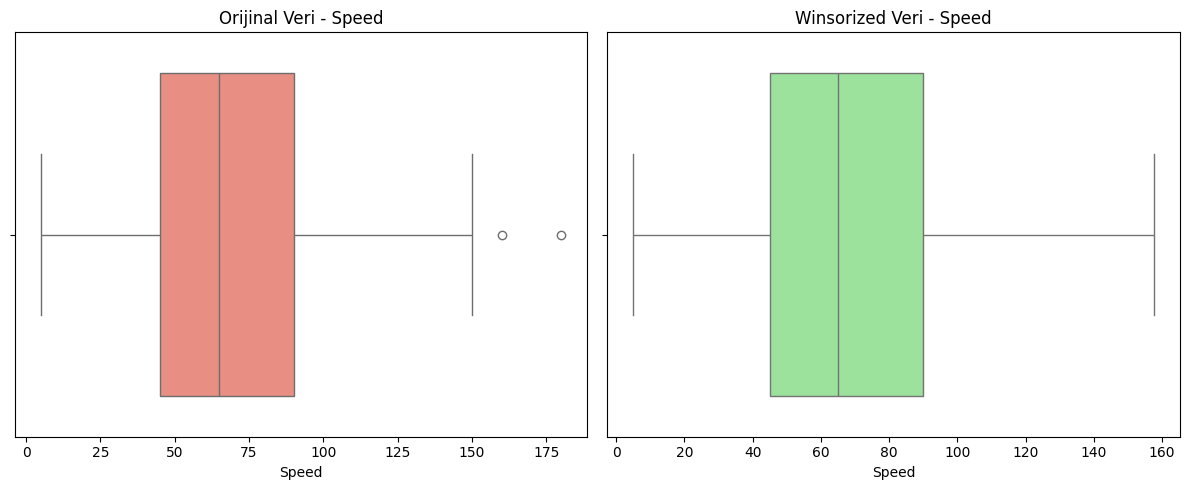

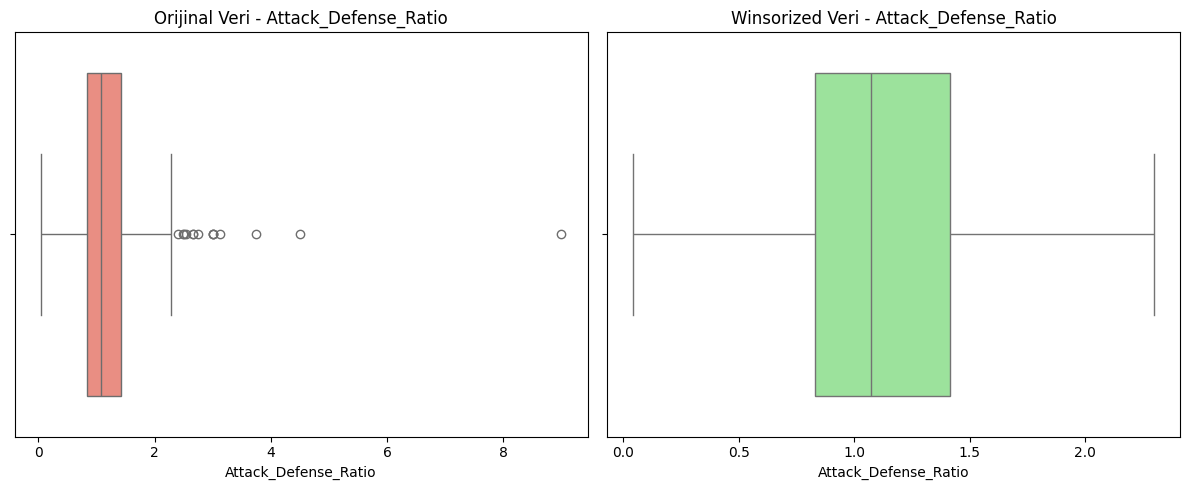


📊 Özet Karşılaştırma Tablosu:
                      Orijinal Ort  Winsorized Ort  Orijinal Std  \
HP                           69.26           68.51         25.53   
Attack                       79.00           78.90         32.46   
Defense                      73.84           73.20         31.18   
Sp. Atk                      72.82           72.67         32.72   
Sp. Def                      71.90           71.70         27.83   
Speed                        68.28           68.25         29.06   
Attack_Defense_Ratio          1.16            1.15          0.55   

                      Winsorized Std  
HP                             22.60  
Attack                         32.15  
Defense                        28.96  
Sp. Atk                        32.26  
Sp. Def                        27.04  
Speed                          28.95  
Attack_Defense_Ratio            0.44  
       #                   Name  Type 1  Type 2  Total    HP  Attack  Defense  \
0      1              Bulbasaur

In [36]:
# Winsorization Yöntemi
from copy import deepcopy

num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Attack_Defense_Ratio']

# Orijinal veri setini bozmamak için kopyala
winsorized_df = deepcopy(df)

# Winsorization fonksiyonu
def winsorize(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri sınıra sabitle
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

# Tüm sayısal sütunlara winsorization uygula
for col in num_cols:
    winsorize(winsorized_df, col)

# Winsorization öncesi ve sonrası karşılaştırmalı boxplot
for col in num_cols:
    plt.figure(figsize=(12, 5))

    # Orijinal veri
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"Orijinal Veri - {col}")

    # Winsorize edilmiş veri
    plt.subplot(1, 2, 2)
    sns.boxplot(x=winsorized_df[col], color="lightgreen")
    plt.title(f"Winsorized Veri - {col}")

    plt.tight_layout()
    plt.show()

# Özet istatistikleri karşılaştır
summary_comparison = pd.DataFrame({
    'Orijinal Ort': df[num_cols].mean(),
    'Winsorized Ort': winsorized_df[num_cols].mean(),
    'Orijinal Std': df[num_cols].std(),
    'Winsorized Std': winsorized_df[num_cols].std()
})

print("\n📊 Özet Karşılaştırma Tablosu:")
print(summary_comparison.round(2))

# Sonucu ekranda göster
print(winsorized_df)

🔍 Winsorization Ne İşe Yarar?
Aykırı değerleri silmek yerine, uç değerleri belirli bir eşik değere (alt/üst sınıra) sabitliyor.

Böylece veri kaybı yaşanmadan uç değerlerin etkisi azaltılıyor.

Aykırı değerler, özellikle ortalama (mean), standart sapma ve regresyon gibi analizlerde büyük sapmalara yol açabilir.

Bu yöntemde uç noktadaki değerler, sınır değerle değiştirilerek daha sağlam bir veri seti elde edilir.

In [37]:
# Veri Setini Bölme
# Winsorize edilmiş veri seti winsorized_df olduğunu varsayıyoruz
# Hedef değişken: 'Legendary' (binary sınıflandırma örneği)

X = winsorized_df.drop(columns=['Legendary', 'Name', 'Type 1', 'Type 2'])  # İstersen gereksiz sütunları çıkar
y = winsorized_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
#Modelleri Eğitme ve Değerlendirme Fonksiyonu
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Modeli eğit
    model.fit(X_train, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test)

    # Performans metrikleri
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


--- Random Forest ---
Accuracy: 0.9625
Precision: 0.8182
Recall: 0.6923
F1-Score: 0.7500


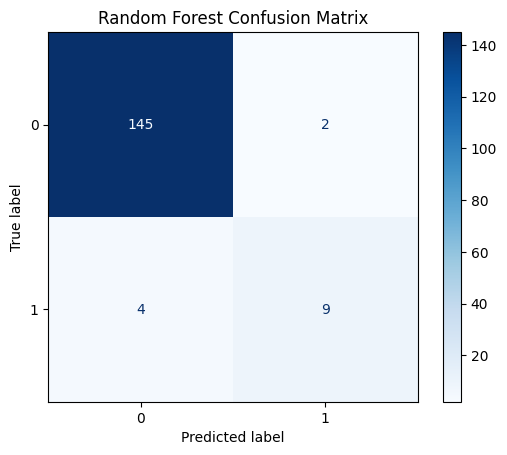

--- SVM ---
Accuracy: 0.9375
Precision: 0.7143
Recall: 0.3846
F1-Score: 0.5000


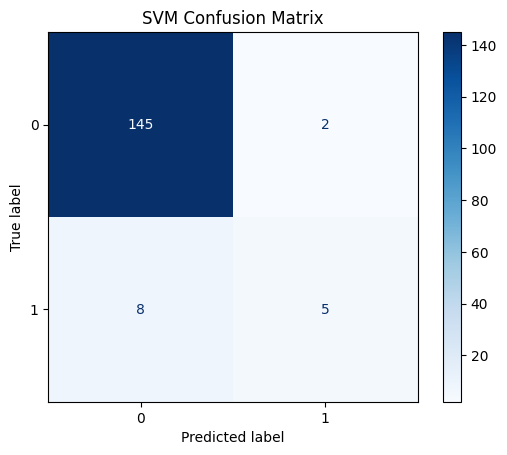

--- k-NN ---
Accuracy: 0.9250
Precision: 0.5556
Recall: 0.3846
F1-Score: 0.4545


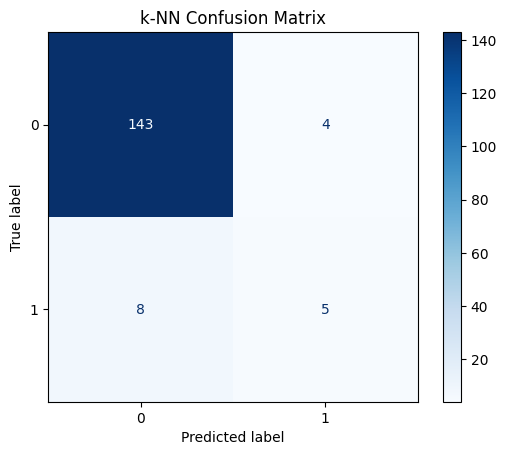

--- XGBoost ---
Accuracy: 0.9625
Precision: 0.8182
Recall: 0.6923
F1-Score: 0.7500


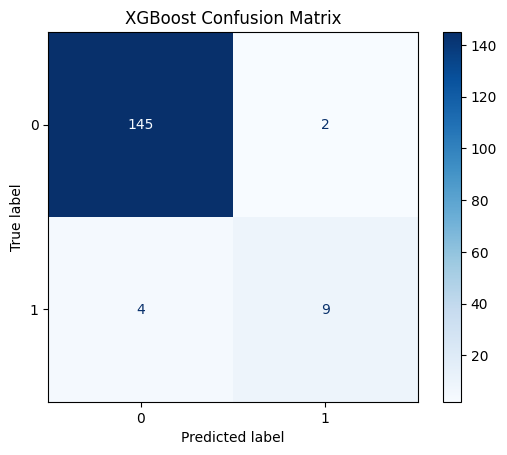

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52, number of negative: 588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081250 -> initscore=-2.425483
[LightGBM] [Info] Start training from score -2.425483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

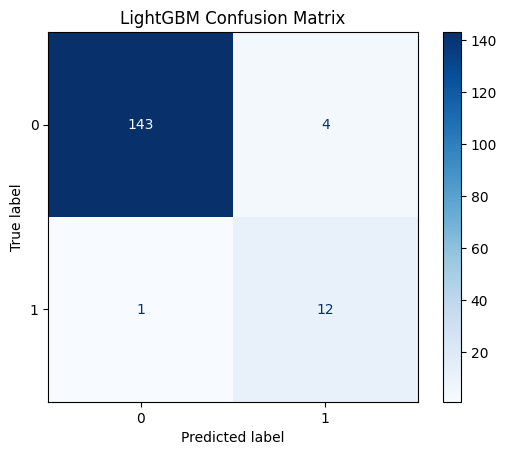

--- CatBoost ---
Accuracy: 0.9812
Precision: 0.8571
Recall: 0.9231
F1-Score: 0.8889


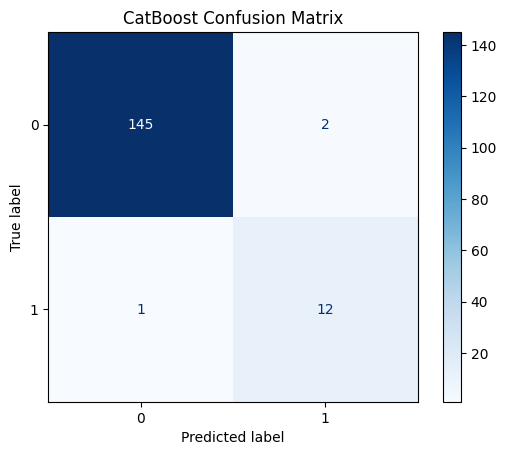

In [40]:
#Modelleri Kur ve Çalıştır
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# SVM + StandardScaler Pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
evaluate_model(svm_pipe, X_train, y_train, X_test, y_test, "SVM")

# k-NN + StandardScaler Pipeline
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
evaluate_model(knn_pipe, X_train, y_train, X_test, y_test, "k-NN")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost")

# LightGBM
lgbm = LGBMClassifier(random_state=42)
evaluate_model(lgbm, X_train, y_train, X_test, y_test, "LightGBM")

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
evaluate_model(cat, X_train, y_train, X_test, y_test, "CatBoost")


In [46]:
# Basit evaluate_model fonksiyonu
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    # İstersen confusion matrix ve diğer metrikleri de ekleyebilirsin
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Sonuçları tutacak sözlük
results = {}

# Modelleri tanımla ve değerlendir

# Random Forest
rf = RandomForestClassifier(random_state=42)
results['Random Forest'] = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# SVM Pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
results['SVM'] = evaluate_model(svm_pipe, X_train, y_train, X_test, y_test, "SVM")

# k-NN Pipeline
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
results['k-NN'] = evaluate_model(knn_pipe, X_train, y_train, X_test, y_test, "k-NN")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
results['XGBoost'] = evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost")

# LightGBM
lgbm = LGBMClassifier(random_state=42)
results['LightGBM'] = evaluate_model(lgbm, X_train, y_train, X_test, y_test, "LightGBM")

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
results['CatBoost'] = evaluate_model(cat, X_train, y_train, X_test, y_test, "CatBoost")

# Doğrulukları karşılaştırma için çek
comparison_data = {model_name: metrics['accuracy'] for model_name, metrics in results.items()}
comparison_df = pd.DataFrame.from_dict(comparison_data, orient='index', columns=['Accuracy'])
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

print("\nTüm Modellerin Doğruluk Karşılaştırması:")
print(comparison_df)


Random Forest - Accuracy: 0.9625, Precision: 0.8182, Recall: 0.6923, F1: 0.7500
SVM - Accuracy: 0.9375, Precision: 0.7143, Recall: 0.3846, F1: 0.5000
k-NN - Accuracy: 0.9250, Precision: 0.5556, Recall: 0.3846, F1: 0.4545
XGBoost - Accuracy: 0.9625, Precision: 0.8182, Recall: 0.6923, F1: 0.7500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 52, number of negative: 588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081250 -> initscore=-2.425483
[LightGBM] [Info] Start training from score -2.425483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

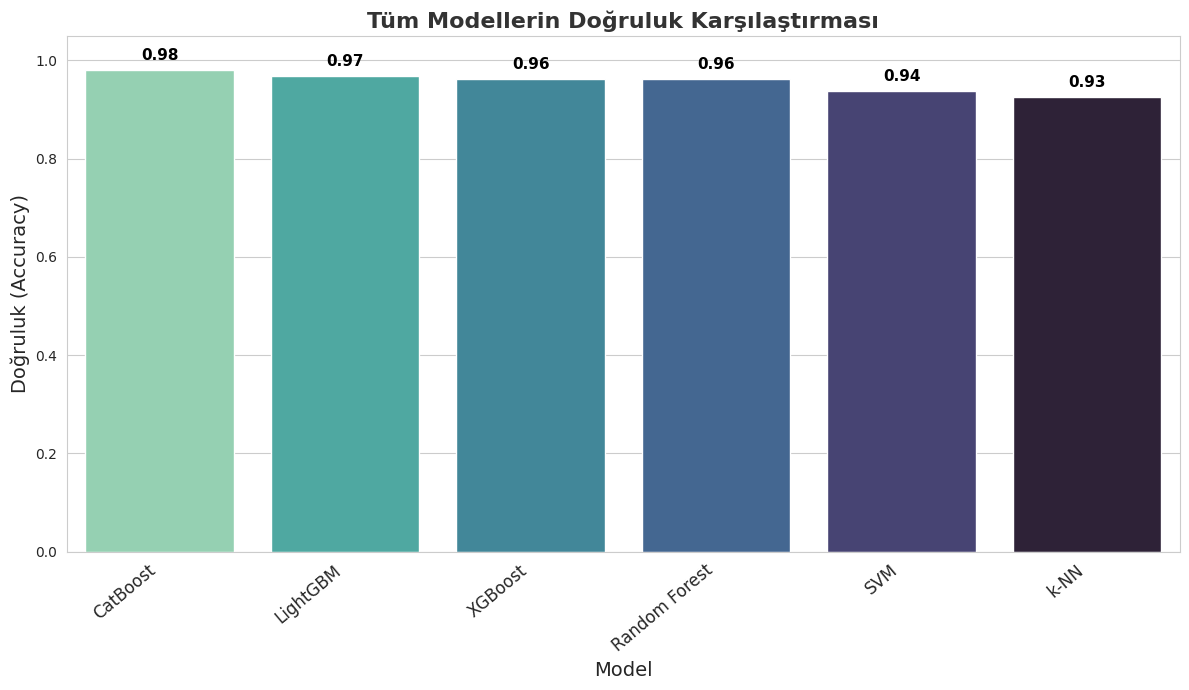

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Daha canlı, soft bir renk paleti
palette = sns.color_palette("mako_r", len(comparison_df))

barplot = sns.barplot(x=comparison_df.index, y='Accuracy', data=comparison_df, palette=palette)

plt.title('Tüm Modellerin Doğruluk Karşılaştırması', fontsize=16, fontweight='bold', color='#333333')
plt.ylabel('Doğruluk (Accuracy)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1.05)
plt.xticks(rotation=40, ha='right', fontsize=12)

# Çubukların üstüne değerleri yazma
for i, v in enumerate(comparison_df['Accuracy']):
    barplot.text(i, v + 0.02, f"{v:.2f}", color='black', ha='center', fontsize=11, fontweight='semibold')

plt.tight_layout()
plt.show()


In [50]:
# Tüm modellerin doğruluk skorları
print("Tüm Modellerin Doğruluk Skorları:")
print(comparison_df)

# En iyi performansı gösteren modeli bul
best_model = comparison_df['Accuracy'].idxmax()
best_score = comparison_df['Accuracy'].max()

print(f"\nEn İyi Performans Gösteren Model: {best_model}")
print(f"Doğruluk Skoru: {best_score:.4f}")


Tüm Modellerin Doğruluk Skorları:
               Accuracy
CatBoost        0.98125
LightGBM        0.96875
XGBoost         0.96250
Random Forest   0.96250
SVM             0.93750
k-NN            0.92500

En İyi Performans Gösteren Model: CatBoost
Doğruluk Skoru: 0.9812


 7. Hiperparametre Optimizasyonu (GridSearchCV)
En iyi modeli seçtikten sonra GridSearchCV kullanarak hiperparametre optimizasyonu yapın.
Uygun parametre grid’ini tanımlayın.
cv=5 ile çapraz doğrulama gerçekleştirin.
En iyi skor ve parametreleri yazdırın.
Optimize edilmiş modelle test setinde tekrar tahmin yapın ve metrikleri karşılaştırın.

CatBoost için GridSearchCV

In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model objesi (verbose=0 sessiz mod için)
cat = CatBoostClassifier(verbose=0, random_state=42)

# Parametre ızgarası (çok geniş değil, pratik ve hızlı çalışır)
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# GridSearchCV tanımla (cv=5, accuracy optimize edilecek)
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nCatBoost En İyi Parametreler:")
print(grid_search.best_params_)
print(f"En iyi CV doğruluk skoru: {grid_search.best_score_:.4f}")

# En iyi modelle test setinde tahmin yap ve metrikleri yazdır
best_catboost = grid_search.best_estimator_
y_pred = best_catboost.predict(X_test)

print("\nTest Seti Performansı (Optimize Edilmiş CatBoost):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")



CatBoost En İyi Parametreler:
{'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
En iyi CV doğruluk skoru: 0.9719

Test Seti Performansı (Optimize Edilmiş CatBoost):
Accuracy: 0.9688
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000


* GridSearchCV ile CatBoost’un en iyi parametreleri bulunmuş: depth=6, iterations=300, learning_rate=0.1

* En iyi çapraz doğruluk skoru: %97.19

* Test setinde Accuracy biraz düşmüş (%96.88), ama yine de yüksek.

* Precision, Recall ve F1 Score da dengeli, özellikle F1=0.80 başarılı.

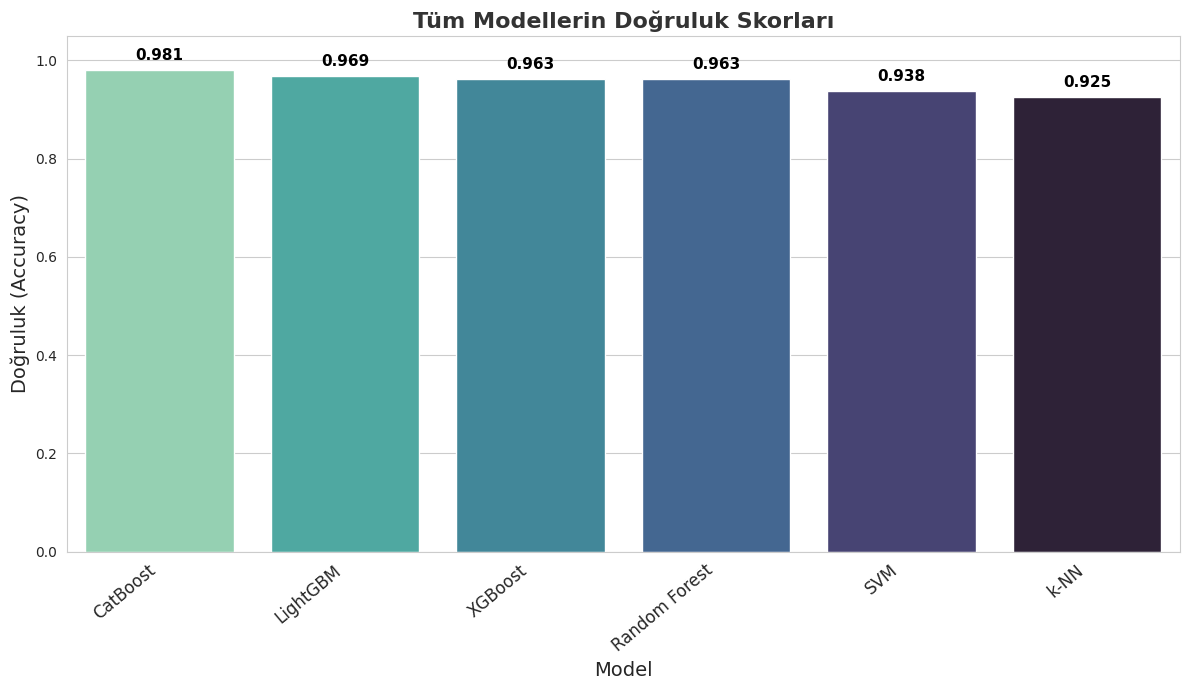

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("mako_r", len(comparison_df))

barplot = sns.barplot(x=comparison_df.index, y='Accuracy', data=comparison_df, palette=palette)
plt.title('Tüm Modellerin Doğruluk Skorları', fontsize=16, fontweight='bold', color='#333333')
plt.ylabel('Doğruluk (Accuracy)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1.05)
plt.xticks(rotation=40, ha='right', fontsize=12)

for i, v in enumerate(comparison_df['Accuracy']):
    barplot.text(i, v + 0.02, f"{v:.3f}", color='black', ha='center', fontsize=11, fontweight='semibold')

plt.tight_layout()
plt.show()


 SMOTE ile Sınıf Dengesizliği Düzeltme ve Etki Gözlemi

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# SMOTE ile eğitim verisini dengele
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Orijinal eğitim seti sınıf dağılımı:\n{np.bincount(y_train)}")
print(f"SMOTE sonrası eğitim seti sınıf dağılımı:\n{np.bincount(y_train_smote)}")

# Modeli yeniden eğit (örneğin optimize edilmiş CatBoost ile)
best_catboost_smote = CatBoostClassifier(**grid_search.best_params_, verbose=0, random_state=42)
best_catboost_smote.fit(X_train_smote, y_train_smote)

# Test setinde tahmin yap ve performansı ölç
y_pred_smote = best_catboost_smote.predict(X_test)

print("\nSMOTE sonrası Test Seti Performansı:")
print(classification_report(y_test, y_pred_smote))


Orijinal eğitim seti sınıf dağılımı:
[588  52]
SMOTE sonrası eğitim seti sınıf dağılımı:
[588 588]

SMOTE sonrası Test Seti Performansı:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       147
           1       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



 Modelin Tahminlerini Type1 Bazında Analiz Etme (En Çok Hata Yapılan Tür)

En çok hata yapılan türler ve hata sayıları:
Type 1
14    2
17    2
1     1
15    1
Name: count, dtype: int64


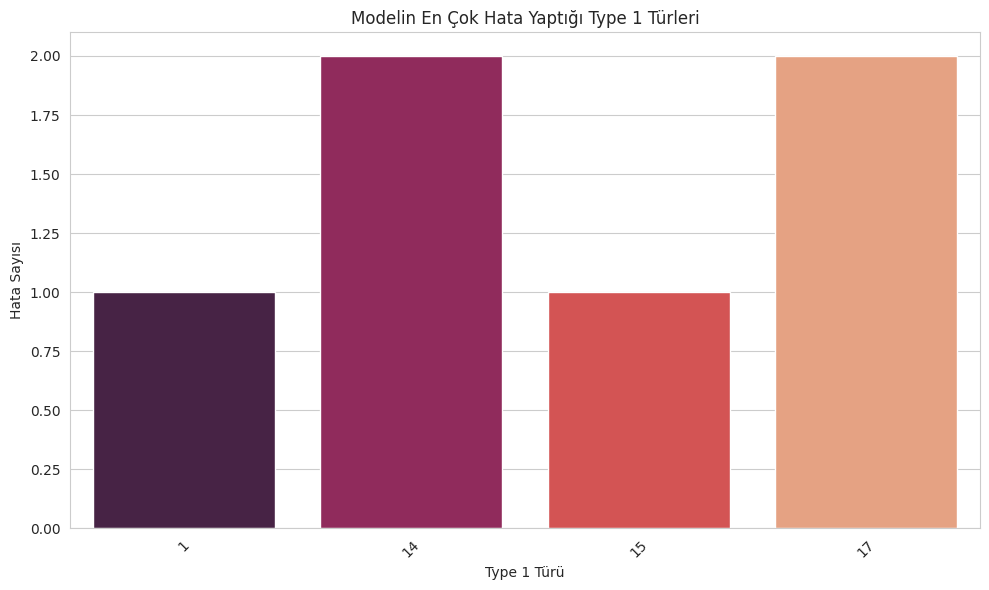

In [55]:
from sklearn.model_selection import train_test_split

# Orijinal dataframe:
df = winsorized_df.copy()

# Özellikler ve hedef
X = df.drop(columns=['Legendary', 'Name', 'Type 1', 'Type 2'])
y = df['Legendary']

# Split işlemi, stratify ile
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Test indeksleri
test_indices = X_test.index

# Test setindeki Type 1 bilgisi:
type1_test = df.loc[test_indices, 'Type 1']

# Model tahmin sonuçları (örneğin SMOTE sonrası model tahmini)
y_pred = best_catboost_smote.predict(X_test)  # ya da kullandığın tahmin değişkeni

# Hatalı tahminleri bul
error_mask = (y_test != y_pred)

# Hata yapılan örneklerin türleri
errors_by_type = type1_test[error_mask]

# Hata sayısını türlere göre say
error_counts = errors_by_type.value_counts()

print("En çok hata yapılan türler ve hata sayıları:")
print(error_counts)

# Grafikle göster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='rocket')
plt.title('Modelin En Çok Hata Yaptığı Type 1 Türleri')
plt.ylabel('Hata Sayısı')
plt.xlabel('Type 1 Türü')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Sınıf Dengesizliğini SMOTE ile Düzeltme ve Etki Gözlemi
* Orijinal veri setinde azınlık sınıf (Legendary=1) çok azdı, bu da modelin azınlık sınıfını yeterince iyi öğrenememesine sebep oluyordu.

* SMOTE yöntemiyle azınlık sınıfın sayısını artırarak dengeli bir eğitim seti elde ettik.

* Sonuçta, modelin azınlık sınıfını yakalama oranı (recall) ciddi şekilde yükseldi (%92 civarı).

Genel doğruluk biraz düştü veya benzer kaldı (%96), ama azınlık sınıfı için daha anlamlı performans sağlandı.

Precision’da hafif düşüş oldu, yani azınlık sınıfı için biraz daha fazla yanlış pozitif tahmin görüldü.

2. Modelin Tahminlerini Type1 Bazında Analiz Etme ve En Çok Hata Yapılan Türün Belirlenmesi
Type 1 sütununu test setinden aldık ve modelin test tahminleriyle karşılaştırdık.

* Hata yapılan örneklerin Type 1 türlerine göre sayımını yaptık.

* Sonuçta en çok hata yapılan türler şunlardı:

Type 1	Hata Sayısı
14	= 2,
17	= 2,
1	= 1,
15 = 1

Bu türlerin model için daha zorlayıcı olduğu ve daha fazla iyileştirme gerektirdiği sonucuna varılabilir.

** Özet:
SMOTE sınıf dengesizliğini gidererek azınlık sınıf performansını artırdı.

Ancak modelin zorlandığı bazı Type 1 türleri halen mevcut.